# PRCP-1020-HousePricePred

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or
the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price
negotiations than the number of bedrooms or a white-picket fence.With 79 explanatory variables describing (almost) every
aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.


## Create a robust machine learning algorithm to accurately predict the price of the house given the various factors across the market

In [1]:
#import necessary liabrary
import numpy as np
import pandas  as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler


In [2]:
#Load the data
data=pd.read_csv(r'/content/data.csv')

data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Basic checks & EDA

In [3]:
#checking the shape
data.shape

(1460, 81)

In [4]:
#
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
#Checking for null values
data.isnull().sum().sum()

np.int64(7829)

In [6]:
#checking missing values in the variable which takes float values
data_flt=list(data.select_dtypes('float').columns)
data[data_flt].isnull().sum()

,0
LotFrontage,259
MasVnrArea,8
GarageYrBlt,81


In [7]:
#checking missing values in the variable which takes integer values
data_int=list(data.select_dtypes('int').columns)

data[data_int].isnull().sum()

,0
Id,0
MSSubClass,0
LotArea,0
OverallQual,0
OverallCond,0
YearBuilt,0
YearRemodAdd,0
BsmtFinSF1,0
BsmtFinSF2,0
BsmtUnfSF,0


In [8]:
#checking missing values in the variable which takes non numeric values
data_obj=list(data.select_dtypes('object').columns)
data[data_obj].isnull().sum()

,0
MSZoning,0
Street,0
Alley,1369
LotShape,0
LandContour,0
Utilities,0
LotConfig,0
LandSlope,0
Neighborhood,0
Condition1,0


In [9]:
#checking for dupicate values
data.duplicated().sum()

np.int64(0)

In [10]:
data[data_flt].shape

(1460, 3)

In [11]:
data[data_obj].describe().T

,count,unique,top,freq
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
Alley,91,2,Grvl,50
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260


In [12]:
data[data_flt].describe()

,LotFrontage,MasVnrArea,GarageYrBlt
count,1201.000000,1452.000000,1379.000000
mean,70.049958,103.685262,1978.506164
std,24.284752,181.066207,24.689725
min,21.000000,0.000000,1900.000000
25%,59.000000,0.000000,1961.000000
50%,69.000000,0.000000,1980.000000
75%,80.000000,166.000000,2002.000000
max,313.000000,1600.000000,2010.000000


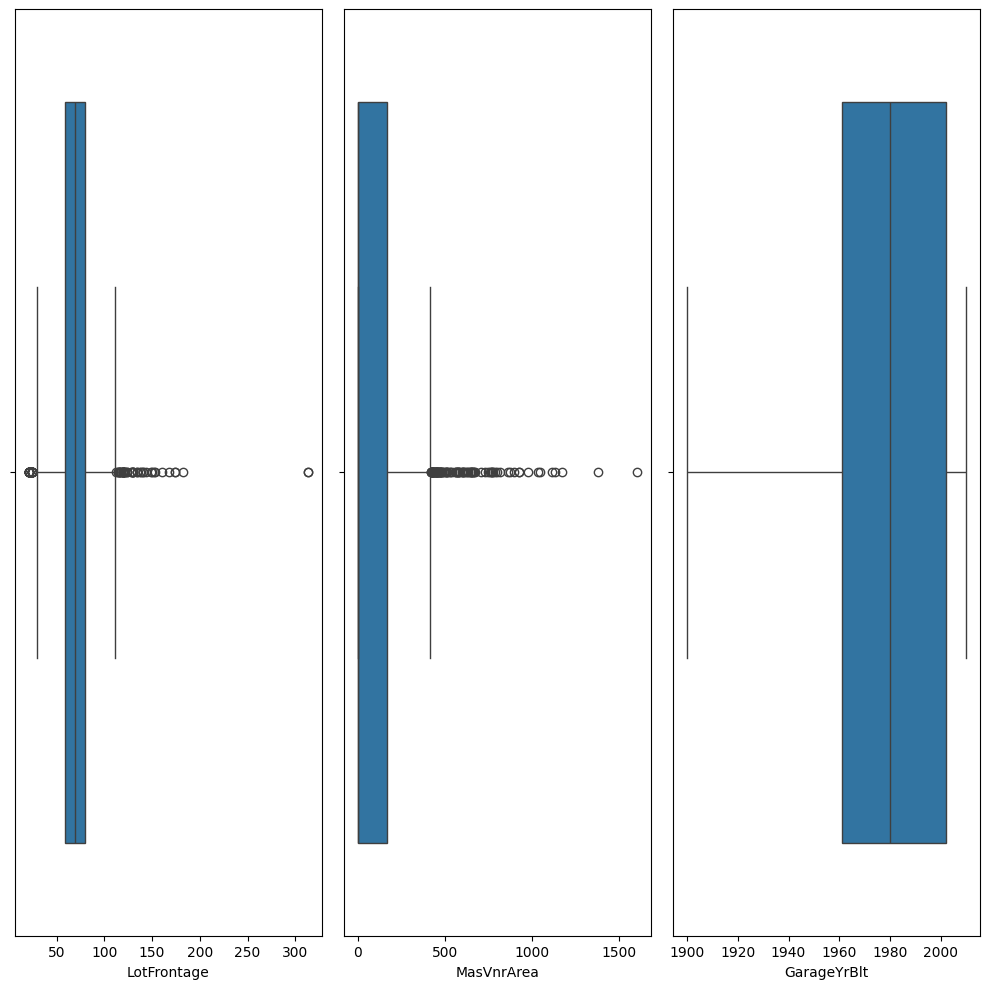

In [13]:
#checking outliers for the variable which take integer values
plt.figure(figsize=(10,10))
plotnumber = 1

for i in data[data_flt].columns:
    if plotnumber <= 3:
        ax = plt.subplot(1,3,plotnumber)
        sns.boxplot(x=data[data_flt][i])
        plt.xlabel(i,fontsize=10)
    plotnumber +=1
plt.tight_layout()

In [14]:
data[data_int].shape

(1460, 35)

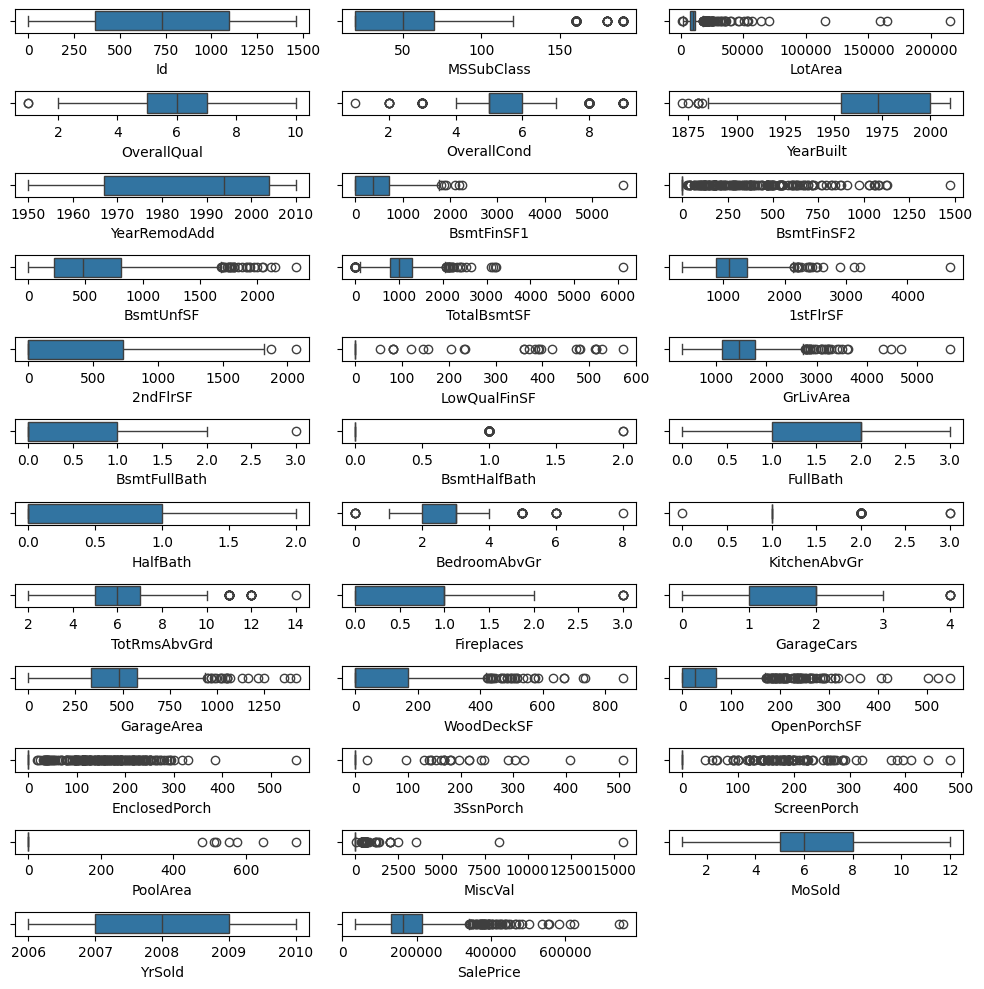

In [15]:
#checking outliers for the variable which take integer values
plt.figure(figsize=(10,10))
plotnumber = 1

for i in data[data_int].columns:
    if plotnumber <= 35:
        ax = plt.subplot(12,3,plotnumber)
        sns.boxplot(x=data[data_int][i])
        plt.xlabel(i,fontsize=10)
    plotnumber +=1
plt.tight_layout()

In [16]:
data[data_int].describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0
BsmtUnfSF,1460.0,567.240411,441.866955,0.0,223.00,477.5,808.00,2336.0


In [17]:
#handeling missing values
#remove those columns which have mor than 50% missing values#remove Utilities-as Allpub-1459,#,'street
data=data.drop(['Alley','MasVnrType','FireplaceQu','PoolQC','Fence','MiscFeature','Utilities','Street'],axis=1)

In [18]:
data.fillna(value={'LotFrontage':data.LotFrontage.median(),'MasVnrArea':data.MasVnrArea.median(),
                   'GarageYrBlt':data.GarageYrBlt.median(),
                   'GarageType':'Attchd','GarageFinish':'Unf','GarageQual':'TA',
                   'GarageCond':'TA','PavedDrive':'Y','BsmtFinType2':'Unf'},inplace=True)
#data.fillna(value={'GarageType':data.GarageType.mode(),'GarageFinish':data.GarageFinish.mode(),
#                   'GarageQual':data.GarageQual.mode(),'GarageCond ':data.GarageCond .mode(),'PavedDrive':data.PavedDrive.mode()},inplace=True)


In [19]:
data.isnull().sum()

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,0
LotArea,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


In [20]:
#remove the missing values
data= data.dropna(subset=['BsmtQual','Electrical','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2'])

### Feature Engineering

In [21]:
enc = OrdinalEncoder(categories=[['FV','RL','RM','RH','C (all)']])
data['MSZoning'] = enc.fit_transform(data[['MSZoning']])
enc1 = OrdinalEncoder(categories=[['Reg','IR1','IR2','IR3'][::-1]])
data['LotShape'] = enc1.fit_transform(data[['LotShape']])
data['PavedDrive'] = OrdinalEncoder(categories=[['Y','P','N'][::-1]]).fit_transform(data[['PavedDrive']])
data['HouseStyle'] = OrdinalEncoder(categories=[['1Story', '1.5Unf', '1.5Fin', 'SLvl', 'SFoyer', '2Story', '2.5Unf', '2.5Fin'][::-1]]).fit_transform(data[['HouseStyle']])
data['RoofStyle'] = OrdinalEncoder(categories=[['Mansard','Hip','Gambrel','Gable','Flat','Shed'][::-1]]).fit_transform(data[['RoofStyle']])
data['LandContour'] = OrdinalEncoder(categories=[['Low', 'Bnk', 'HLS', 'Lvl'][::-1]]).fit_transform(data[['LandContour']])
data['GarageCond'] = OrdinalEncoder(categories=[['Ex','Gd','TA','Fa','Po'][::-1]]).fit_transform(data[['GarageCond']])
data['GarageQual'] = OrdinalEncoder(categories=[['Ex','Gd','TA','Fa','Po'][::-1]]).fit_transform(data[['GarageQual']])
data['GarageType'] = OrdinalEncoder(categories=[['BuiltIn','Attchd','2Types','Detchd','Basment','CarPort'][::-1]]).fit_transform(data[['GarageType']])
data['KitchenQual'] = OrdinalEncoder(categories=[['Ex','Gd','TA','Fa'][::-1]]).fit_transform(data[['KitchenQual']])
data['CentralAir'] = OrdinalEncoder(categories=[['Y','N'][::-1]]).fit_transform(data[['CentralAir']])


In [22]:
data['HeatingQC'] = OrdinalEncoder(categories=[['Ex','Gd','TA','Fa','Po'][::-1]]).fit_transform(data[['HeatingQC']])
data['BsmtFinType2'] = OrdinalEncoder(categories=[['GLQ','ALQ','BLQ','LwQ','Rec','Unf'][::-1]]).fit_transform(data[['BsmtFinType2']])
data['BsmtFinType1'] = OrdinalEncoder(categories=[['GLQ','ALQ','BLQ','LwQ','Rec','Unf'][::-1]]).fit_transform(data[['BsmtFinType1']])
data['Condition1'] = OrdinalEncoder(categories=[['Norm','Feedr','Artery','RRAn','PosN','RRAe','PosA','RRNn','RRNe'][::-1]]).fit_transform(data[['Condition1']])
data['Condition2'] = OrdinalEncoder(categories=[['Norm','Feedr','Artery','RRAn','PosN','RRAe','PosA','RRNn','RRNe'][::-1]]).fit_transform(data[['Condition2']])
data['LotConfig'] = OrdinalEncoder(categories=[['Inside','Corner','CulDSac','FR2','FR3'][::-1]]).fit_transform(data[['LotConfig']])
data['LandSlope'] = OrdinalEncoder(categories=[['Gtl','Mod','Sev'][::-1]]).fit_transform(data[['LandSlope']])
data['ExterQual'] = OrdinalEncoder(categories=[['Ex','Gd','TA','Fa'][::-1]]).fit_transform(data[['ExterQual']])
data['SaleCondition'] = OrdinalEncoder(categories=[['Partial','Normal','Alloca','AdjLand','Family','Abnorml'][::-1]]).fit_transform(data[['SaleCondition']])


In [23]:
data['BsmtQual'] = OrdinalEncoder(categories=[['Ex','Gd','TA','Fa'][::-1]]).fit_transform(data[['BsmtQual']])
data['BsmtCond'] = OrdinalEncoder(categories=[['Gd','TA','Fa','Po'][::-1]]).fit_transform(data[['BsmtCond']])
data['ExterCond'] = OrdinalEncoder(categories=[['Ex','Gd','TA','Fa','Po'][::-1]]).fit_transform(data[['ExterCond']])

data['Foundation'] = OrdinalEncoder(categories=[['PConc','CBlock','BrkTil','Stone','Slab','Wood']]).fit_transform(data[['Foundation']])
data['GarageFinish'] = OrdinalEncoder(categories=[['Fin','RFn','Unf'][::-1]]).fit_transform(data[['GarageFinish']])
data['Functional'] = OrdinalEncoder(categories=[['Sev','Typ','Min2','Min1','Mod','Maj1','Maj2'][::-1]]).fit_transform(data[['Functional']])
data['Electrical'] = OrdinalEncoder(categories=[['SBrkr','FuseA','FuseF','FuseP','Mix'][::-1]]).fit_transform(data[['Electrical']])
data['BsmtExposure'] = OrdinalEncoder(categories=[['Gd','Av','Mn','No'][::-1]]).fit_transform(data[['BsmtExposure']])

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['SaleType'] = le.fit_transform(data['SaleType'])
data['Exterior2nd'] = le.fit_transform(data['Exterior2nd'])

In [25]:
#one encoding
data=pd.get_dummies(data,columns=['BldgType','Heating'],dtype='int')

In [ ]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,SalePrice,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW
0,1,60,1.0,65.0,8450,3.0,0.0,4.0,2.0,CollgCr,...,208500,1,0,0,0,0,1,0,0,0
1,2,20,1.0,80.0,9600,3.0,0.0,1.0,2.0,Veenker,...,181500,1,0,0,0,0,1,0,0,0
2,3,60,1.0,68.0,11250,2.0,0.0,4.0,2.0,CollgCr,...,223500,1,0,0,0,0,1,0,0,0
3,4,70,1.0,60.0,9550,2.0,0.0,3.0,2.0,Crawfor,...,140000,1,0,0,0,0,1,0,0,0
4,5,60,1.0,84.0,14260,2.0,0.0,1.0,2.0,NoRidge,...,250000,1,0,0,0,0,1,0,0,0


In [26]:
#,'RoofMatl'-same value 5%,Exterior1st,Exterior2nd'-not rtant house price prediction
data1=data.drop(['Neighborhood','Exterior1st','RoofMatl'],axis=1)

In [27]:
data=data1

In [28]:
data_obj1=list(data1.select_dtypes('object').columns)
data1[data_obj1].head()

""
0
1
2
3
4


In [ ]:
#what encoding should i use-Exterior2nd,BsmtFinType1


In [29]:
x=data.drop('SalePrice',axis=1)
y=data['SalePrice']

In [30]:
#Train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)


### Model Building

In [31]:
#RandomForest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(x_train, y_train)
y_pred = model_RFR.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2r = r2_score(y_test, y_pred)

# Print the metrics
print("Mean Squared Error:", mse)
print("R-squared:", r2r)

Mean Squared Error: 1059434461.1540939
R-squared: 0.8455405044509765


In [36]:
score_rf = round(r2r*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 84.55 %


In [32]:
#Support vector machine
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, r2_score
model_SVR = svm.SVR()
model_SVR.fit(x_train,y_train)
Y_pred = model_SVR.predict(x_test)
mses = mean_squared_error(y_test, y_pred)
r2s = r2_score(y_test, y_pred)

# Print the metrics
print("Mean Squared Error:", mses)
print("R-squared:", r2s)

Mean Squared Error: 1059434461.1540939
R-squared: 0.8455405044509765


In [33]:
score_sm = round(r2s*100,2)

print("The accuracy score achieved using svm is: "+str(score_sm)+" %")

The accuracy score achieved using svm is: 84.55 %


In [37]:
#Linear Regression
from sklearn.linear_model import LinearRegression

#sc=StandardScaler()
#x_train=sc.fit_transform(x_train)

model_LR = LinearRegression()
model_LR.fit(x_train, y_train)
Y_pred = model_LR.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2l = r2_score(y_test, y_pred)

# Print the metrics
print("Mean Squared Error:", mse)
print("R-squared:", r2l)


Mean Squared Error: 1059434461.1540939
R-squared: 0.8455405044509765


In [39]:
score_lr = round(r2s*100,2)

print("The accuracy score achieved using svm is: "+str(score_lr)+" %")

The accuracy score achieved using svm is: 84.55 %


In [40]:
#the variable like

In [41]:
scores = [score_sm,score_rf,score_lr]
algorithms = ["Support Vector Machine","Random Forest","Linear regression"]

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Support Vector Machine is: 84.55 %
The accuracy score achieved using Random Forest is: 84.55 %
The accuracy score achieved using Linear regression is: 84.55 %


### Model Comparison Report

<ipython-input-42-85ff2ef5e0f3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=algorithms, y=scores, palette="muted")


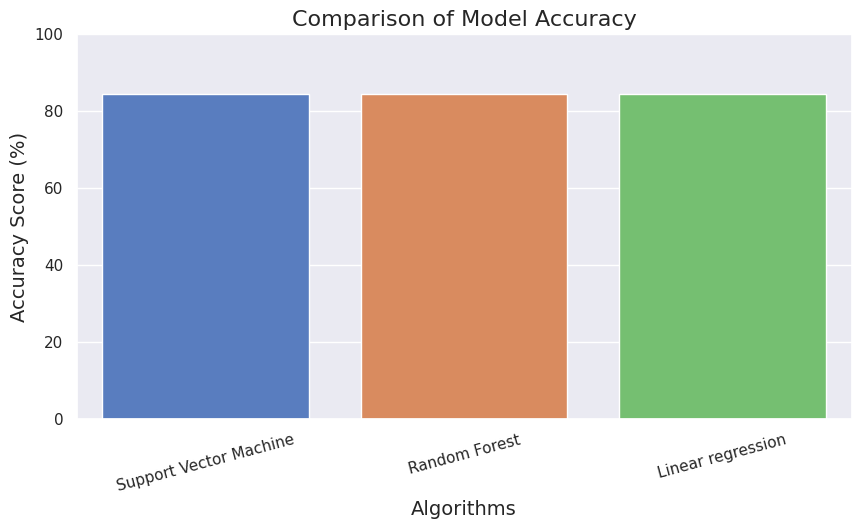

In [42]:
sns.set(rc={'figure.figsize': (10, 5)})

sns.barplot(x=algorithms, y=scores, palette="muted")

plt.xlabel("Algorithms", fontsize=14)
plt.ylabel("Accuracy Score (%)", fontsize=14)
plt.title("Comparison of Model Accuracy", fontsize=16)
plt.ylim(0, 100)
plt.xticks(rotation=15)
plt.show()


I have used Support vector machine,Random Forest,Linear regression Model .I have got the R^2 values .86,.85,.85 respectively.
So Accuracy of all model are all most equal.

### Challenges faced

1)There was many missing values in the data set.Which columns has more than 50% missing values,I have removed these one and
some missing values has replaced by median.some rows are removed which have missing values.
2)There are lot of categorial columns in the dataset- I have converted most of them using ordinal encoding.I have also used one
hot encoding and labe encoding

### Come up with suggestions for the customer to buy the house according to the area, price and other requirements

 Based on your preferred area, budget, and requirements, we recommend houses that best match your needs. Our price prediction model ensures you get the best value for your investment."